In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Get image dimensions
image_height = x_train.shape[1]
image_width = x_train.shape[2]

print(f"MNIST image size: {image_height} x {image_width}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST image size: 28 x 28


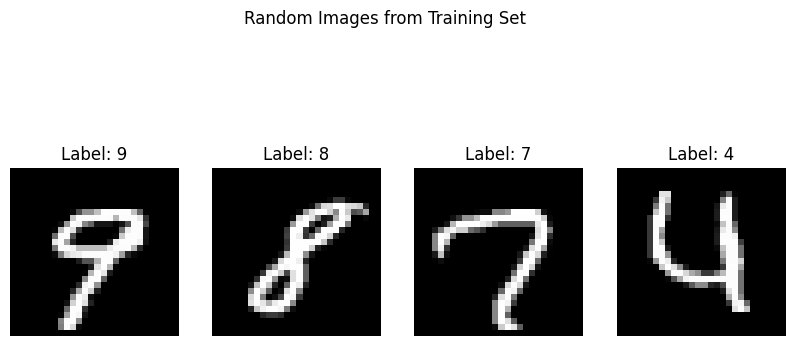

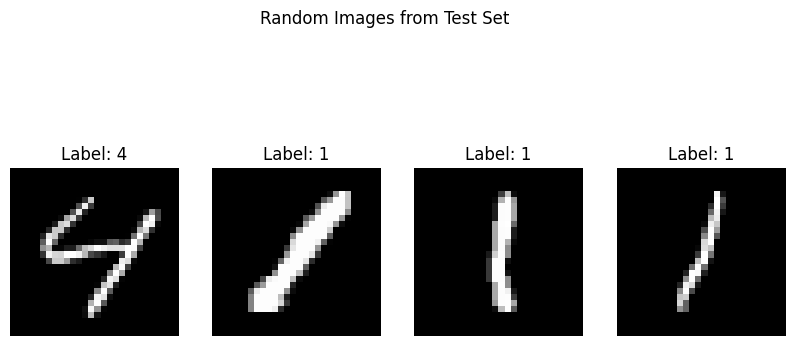

In [ ]:
# Display random images from the training and test sets
def display_random_images(dataset, labels, title):

    random_indices = np.random.choice(dataset.shape[0], 4, replace=False)
    selected_images = dataset[random_indices]
    selected_labels = labels[random_indices]

    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(selected_images[i], cmap='gray')
        plt.title(f"Label: {selected_labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


display_random_images(x_train, y_train, "Training Set")
display_random_images(x_test, y_test, "Test Set")


In [ ]:

print(f"Number of training images: {x_train.shape[0]}")
print(f"Number of testing images: {x_test.shape[0]}")


x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Number of training images: 60000
Number of testing images: 10000
Training data shape: (60000, 28, 28, 1, 1)
Testing data shape: (10000, 28, 28, 1, 1)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()

# 3: First convolutional layer
model.add(layers.Conv2D(
    filters=8,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding='valid',         # No padding
    activation='relu',
    input_shape=(28, 28, 1)
))

# 4: Average pooling layer
model.add(layers.AveragePooling2D(pool_size=(2, 2)))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Add a Conv2D layer with specified parameters
model.add(layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,248 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Add max pooling layer with pool size (2, 2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Step 7: Add a Conv2D layer with four 1x1 filters
model.add(layers.Conv2D(
    filters=4,
    kernel_size=(1, 1),
    strides=(1, 1),
    padding='valid',
    activation='relu'
))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,316 (5.14 KB)

 Trainable params: 1,316 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 8: Flatten the output of the previous layer
model.add(layers.Flatten())

model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,686 (6.59 KB)

 Trainable params: 1,686 (6.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 9: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6516 - loss: 1.0807 - val_accuracy: 0.9340 - val_loss: 0.2146
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9334 - loss: 0.2160 - val_accuracy: 0.9498 - val_loss: 0.1637
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9528 - loss: 0.1589 - val_accuracy: 0.9616 - val_loss: 0.1294
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9587 - loss: 0.1358 - val_accuracy: 0.9632 - val_loss: 0.1207
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9640 - loss: 0.1242 - val_accuracy: 0.9646 - val_loss: 0.1120
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9661 - loss: 0.1116 - val_accuracy: 0.9669 - val_loss: 0.1055
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9688 - loss: 0.1059 - val_accuracy: 0.9642 - val_loss: 0.1155
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9697 - loss: 0

In [ ]:
# Step 10: Evaluate the model on the test set and print the test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.0975
Test accuracy: 0.9739999771118164
